In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import xlrd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.set_option('display.max_columns', None) # To display all columns

## Reading in Data and Cleaning Data

In [2]:
df = pd.read_excel('Data/drug_consumption.xls')

We delete every row where a participant indicated the use of 'Semeron', which is a fictional, non existing drug, used to pick out individuals who are exaggerating their drug use:

In [3]:
df1 = df.drop(df.loc[df["Semer"] != "CL0"].index)

Reassigning "real" values for Gender, Country & Education, for better visualizations

In [4]:
Gencat = df1['Gender'].apply(lambda x: 1 if x > 0 else 0)
df1["Gender"] = Gencat
df1["Gender"] = df1["Gender"].astype("category")

In [5]:
Countrycat = df1['Country'].apply(lambda x: {(-0.09765):'Australia', 
                                             0.24923:'Canada',
                                             0.96082:'UK',
                                            (-0.46841):'New Zealand',
                                            (-0.28519):'Other',
                                            (0.21128):'R.o.Ireland',
                                            (-0.57009):'USA'}.get(x,''))
df1.insert(5, "Country_Name", Countrycat)
df1["Country_Name"] = df1["Country_Name"].astype("category")

In [6]:
Educat = df1['Education'].apply(lambda x: {(-2.43591): "under 16y",
                                           (-1.73790): "16y",
                                           (-1.43719): "17y",
                                           (-1.22751): '18y',
                                           (-0.61113):'College/Uni',
                                           (-0.05921):'Cert./Diploma',
                                           (0.45468): 'Uni Degree', 
                                           (1.16365):'Master',
                                           (1.98437): 'PhD'}.get(x,''))
df1.insert(4, "Education_Level", Educat)
df1["Education_Level"] = df1["Education_Level"].astype("category")

## Getting an overview of the Data

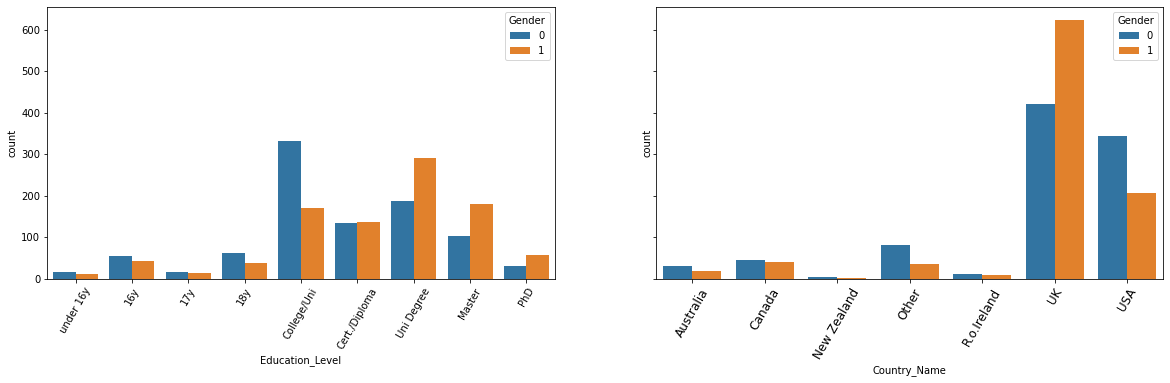

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), sharey=True)

edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']

g = sns.countplot(data=df1, x="Education_Level", order = edu_order, hue='Gender', ax=axes[0])
g.set_xticklabels(edu_order, rotation=60)

g1 = sns.countplot(data=df1, x="Country_Name", hue='Gender', ax=axes[1])
plt.xticks(rotation=60, size = 12);

<AxesSubplot:xlabel='VSA', ylabel='count'>

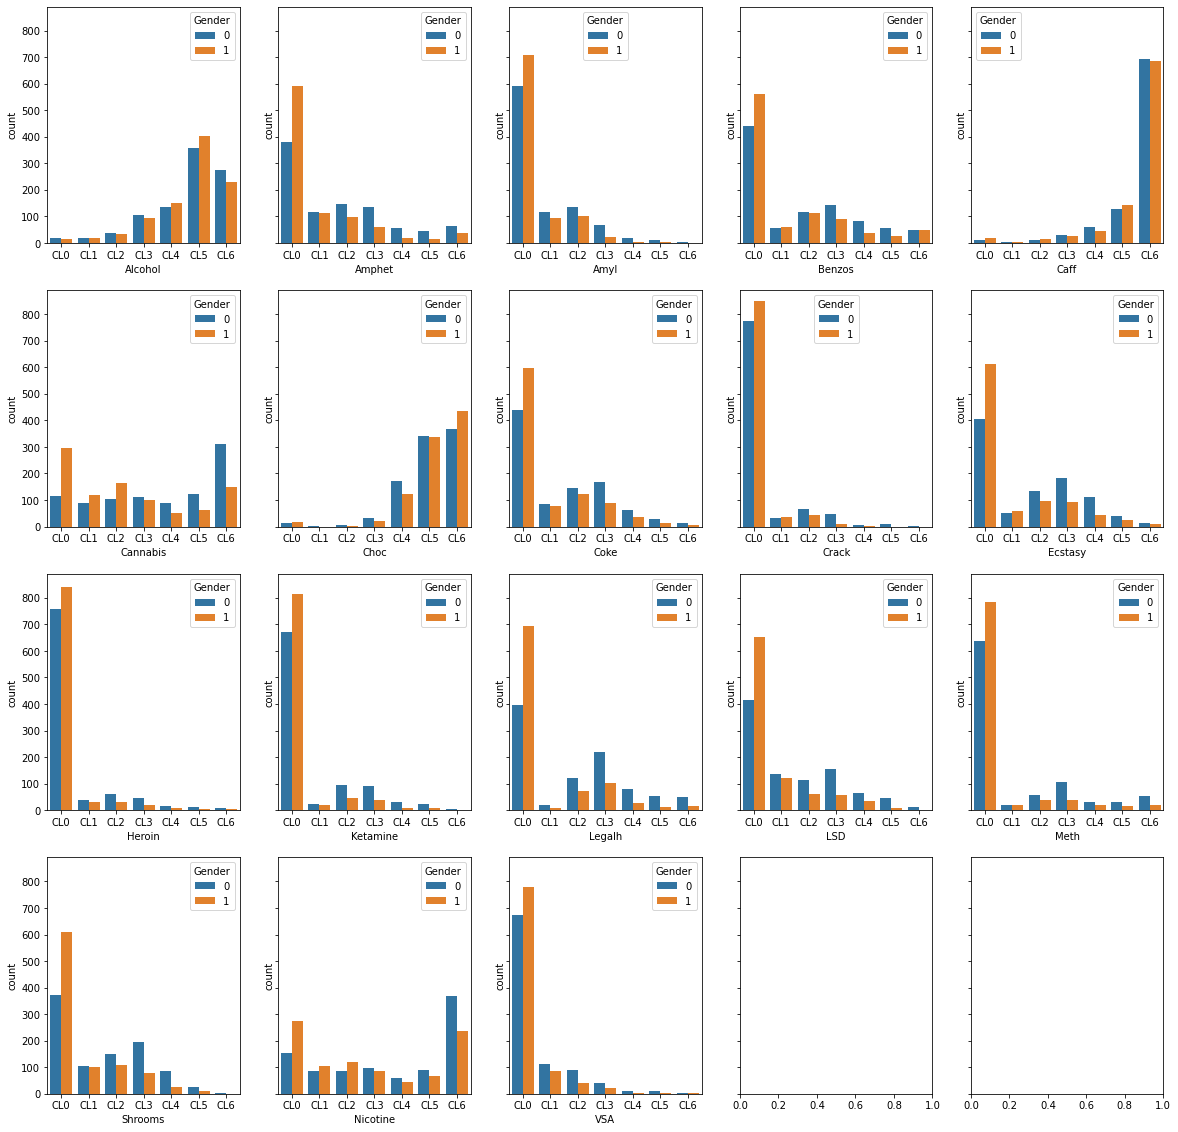

In [9]:
clsorder = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

f, axes = plt.subplots(4, 5, figsize=(20, 20), sharey=True)

sns.countplot(data=df1, x="Alcohol", order = clsorder, hue='Gender', ax=axes[0, 0])
sns.countplot(data=df1, x="Amphet", order = clsorder, hue='Gender', ax=axes[0, 1])
sns.countplot(data=df1, x="Amyl", order = clsorder, hue='Gender', ax=axes[0, 2])
sns.countplot(data=df1, x="Benzos", order = clsorder, hue='Gender', ax=axes[0, 3])
sns.countplot(data=df1, x="Caff", order = clsorder, hue='Gender', ax=axes[0, 4])
sns.countplot(data=df1, x="Cannabis", order = clsorder, hue='Gender', ax=axes[1, 0])
sns.countplot(data=df1, x="Choc", order = clsorder, hue='Gender', ax=axes[1, 1])
sns.countplot(data=df1, x="Coke", order = clsorder, hue='Gender', ax=axes[1, 2])
sns.countplot(data=df1, x="Crack", order = clsorder, hue='Gender', ax=axes[1, 3])
sns.countplot(data=df1, x="Ecstasy", order = clsorder, hue='Gender', ax=axes[1, 4])
sns.countplot(data=df1, x="Heroin", order = clsorder, hue='Gender', ax=axes[2, 0])
sns.countplot(data=df1, x="Ketamine", order = clsorder, hue='Gender', ax=axes[2, 1])
sns.countplot(data=df1, x="Legalh", order = clsorder, hue='Gender', ax=axes[2, 2])
sns.countplot(data=df1, x="LSD", order = clsorder, hue='Gender', ax=axes[2, 3])
sns.countplot(data=df1, x="Meth", order = clsorder, hue='Gender', ax=axes[2, 4])
sns.countplot(data=df1, x="Shrooms", order = clsorder, hue='Gender', ax=axes[3, 0])
sns.countplot(data=df1, x="Nicotine", order = clsorder, hue='Gender', ax=axes[3, 1])
sns.countplot(data=df1, x="VSA", order = clsorder, hue='Gender', ax=axes[3, 2])

There are only 3 people who never consumed alcohol and chocolate and just 1 person never consumed any drugs at all:

In [10]:
df1[(df1["Alcohol"] == "CL0") & (df1["Choc"] == "CL0")]

,ID,Age,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
330,333,1.82213,1,-1.22751,18y,0.24923,Canada,-0.31685,-0.46725,-0.43999,-1.55521,0.94156,0.75830,-1.37983,-1.54858,CL0,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL5,CL0,CL0
1277,1281,-0.95197,0,0.45468,Uni Degree,0.96082,UK,-0.50212,0.82562,0.63779,-0.84732,-2.21844,0.93949,1.86203,1.92173,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1743,1747,0.49788,1,1.16365,Master,0.96082,UK,-1.10702,-0.24649,-0.57545,-0.58331,0.13136,0.12331,-0.21712,-1.18084,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
